# Selección de Países e indicadores proyecto <span style="color:green">Esperanza de Vida al Nacer</span>
### Base de Datos Banco Mundial - UNESCO

In [2]:
# Carga de módulos necesarios
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import wbgapi as wb
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

## Revisión de Bases de Datos
En ésta primera parte se realiza una consulta general de las bases de datos existentes en la data del Banco Mundial y una busqueda por palabra clave que sea reprensetativa de los objetivos planteados en los enunciados del proyecto.

In [2]:
# Bases de datos existentes 
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-09-15
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-07-24
15,Global Economic Monitor,GEM,3,2023-07-21


### Objetivo # 1
`La edad` de la persona al momento de adquirir el seguro de vida debe rondar el 50% de la expectativa de vida para esa población; de esta manera la aseguradora tendrá clientes durante un periodo de tiempo más extenso y con ello más ganancia.

In [3]:
# Consulta por expectativa (expectancy)
wb.series.info(q=('expectancy'))

id,value
SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)"
SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
SP.DYN.LE00.MA.IN,"Life expectancy at birth, male (years)"
,3 elements


### Objetivo # 2
`Accesibilidad a la educación`, mientras más acceso a la educación tenga la población mayor será la facilidad de adquisición de un seguro de vida, si el 70% de la población tiene acceso a la educación universitaria, mayor será la probabilidad de que adquieran un seguro de vida.

In [4]:
# Consulta por alfabetización
wb.series.info(q=('literacy'))

id,value
SE.ADT.1524.LT.FE.ZS,"Literacy rate, youth female (% of females ages 15-24)"
SE.ADT.1524.LT.FM.ZS,"Literacy rate, youth (ages 15-24), gender parity index (GPI)"
SE.ADT.1524.LT.MA.ZS,"Literacy rate, youth male (% of males ages 15-24)"
SE.ADT.1524.LT.ZS,"Literacy rate, youth total (% of people ages 15-24)"
SE.ADT.LITR.FE.ZS,"Literacy rate, adult female (% of females ages 15 and above)"
SE.ADT.LITR.MA.ZS,"Literacy rate, adult male (% of males ages 15 and above)"
SE.ADT.LITR.ZS,"Literacy rate, adult total (% of people ages 15 and above)"
,7 elements


In [5]:
# Consulta por Educación (education)
wb.series.info(db=12, q=('tertiary'))

id,value
BAR.TER.CMPT.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.1519.ZS,Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.15UP.FE.ZS,Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.15UP.ZS,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2024.FE.ZS,Barro-Lee: Percentage of female population age 20-24 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2024.ZS,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2529.FE.ZS,Barro-Lee: Percentage of female population age 25-29 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2529.ZS,Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.25UP.FE.ZS,Barro-Lee: Percentage of female population age 25+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.25UP.ZS,Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary


In [6]:
# Pobreza de aprendizaje
wb.series.info(db=12, q=('Learning poverty'))

id,value
SE.LPV.PRIM,Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.FE,Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.MA,Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
,3 elements


In [7]:
# Acceso a recursos para estudiantes
wb.series.info(db=12, q=('access'))

id,value
SABER.EMIS.GOAL4.LVL3,SABER: (Education Management Information Systems) Policy Goal 4 Lever 3: Accessibility
UIS.SCHBSP.1.WCOMPUT,Proportion of primary schools with access to computers for pedagogical purposes (%)
UIS.SCHBSP.1.WELEC,Proportion of primary schools with access to electricity (%)
UIS.SCHBSP.1.WINFSTUDIS,Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%)
UIS.SCHBSP.1.WINTERN,Proportion of primary schools with access to Internet for pedagogical purposes (%)
UIS.SCHBSP.1.WWATA,Proportion of primary schools with access to basic drinking water (%)
UIS.SCHBSP.2.WCOMPUT,Proportion of lower secondary schools with access to computers for pedagogical purposes (%)
UIS.SCHBSP.2.WELEC,Proportion of lower secondary schools with access to electricity (%)
UIS.SCHBSP.2.WINFSTUDIS,Proportion of lower secondary schools with access to adapted infrastructure and materials for students with disabilities (%)
UIS.SCHBSP.2.WINTERN,Proportion of lower secondary schools with access to Internet for pedagogical purposes (%)


### Objetivo # 3
En países donde la `inflación` está sobre el 10% mensual son países NO aptos para inversión, ya que su población tiene, quizá, otras prioridades en las cuales ¨invertir¨.

In [8]:
# Consulta por inflación (inflation)
wb.series.info(q=('inflation'))

id,value
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
,3 elements


### Objetivo # 4
Determinar la influencia del índice `Gini` en la esperanza de vida en cada país. El índice Gini mide la desigualdad de ingresos en una sociedad. Entre mayor desigualdad, mayor será el índice Gini, dependiendo de este índice, podemos definir que porcentaje de la población de los países tienen la facilidad de acceder a un seguro de vida, (Tomese en cuenta género, raza, cultura).

In [9]:
wb.series.info(q=('gini'))

id,value
SI.POV.GINI,Gini index
,1 elements


### Otros indicadores útiles 

In [10]:
# Consulta por PIB per capital (gdp per capita)
wb.series.info(q=('gdp per capita'))

id,value
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.CN,GDP per capita (current LCU)
NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
NY.GDP.PCAP.KN,GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 international $)"
,7 elements


In [11]:
# Consulta por salud (health)
wb.series.info(q=('health'))

id,value
SG.DMK.ALLD.FN.ZS,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)"
SG.DMK.SRCR.FN.ZS,"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)"
SH.MED.CMHW.P3,"Community health workers (per 1,000 people)"
SH.STA.BRTC.ZS,Births attended by skilled health staff (% of total)
SH.UHC.FBP1.ZS,Proportion of population pushed further below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBP2.ZS,Proportion of population pushed further below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBPR.ZS,Proportion of population pushed further below the 60% median consumption poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOPR.ZS,Proportion of population pushed below the 60% median consumption poverty line by out-of-pocket health expenditure (%)


In [12]:
# Consulta por accidentes
wb.series.info(q=('injury'))

id,value
SH.DTH.INJR.ZS,"Cause of death, by injury (% of total)"
SH.STA.TRAF.P5,"Mortality caused by road traffic injury (per 100,000 population)"
,2 elements


In [13]:
# Consulta por Camas en hospitales
wb.series.info(q=('Hospital beds'))

id,value
SH.MED.BEDS.ZS,"Hospital beds (per 1,000 people)"
,1 elements


In [14]:
# Busqueda por Empleo
wb.series.info(db=86)

id,value
JI.AGE.MPYR,"Average age of employers, aged 15-64, total"
JI.AGE.MPYR.FE,"Average age of employers, aged 15-64, female"
JI.AGE.MPYR.HE,"Average age of employers, aged 15-64, above primary education"
JI.AGE.MPYR.LE,"Average age of employers, aged 15-64, primary education and below"
JI.AGE.MPYR.MA,"Average age of employers, aged 15-64, male"
JI.AGE.MPYR.OL,"Average age of employers, aged 25-64"
JI.AGE.MPYR.RU,"Average age of employers, aged 15-64, rural"
JI.AGE.MPYR.UR,"Average age of employers, aged 15-64, urban"
JI.AGE.MPYR.YG,"Average age of employers, aged 15-24"
JI.AGE.SELF,"Average age of self-employed or unpaid workers, aged 15-64, total"


In [68]:
wb.series.info(q=('income'))

id,value
BM.GSR.FCTY.CD,"Primary income payments (BoP, current US$)"
BM.GSR.TOTL.CD,"Imports of goods, services and primary income (BoP, current US$)"
BM.TRF.PRVT.CD,"Secondary income, other sectors, payments (BoP, current US$)"
BN.GSR.FCTY.CD,"Net primary income (BoP, current US$)"
BN.TRF.CURR.CD,"Net secondary income (BoP, current US$)"
BX.GSR.FCTY.CD,"Primary income receipts (BoP, current US$)"
BX.GSR.TOTL.CD,"Exports of goods, services and primary income (BoP, current US$)"
BX.TRF.CURR.CD,"Secondary income receipts (BoP, current US$)"
GC.TAX.YPKG.CN,"Taxes on income, profits and capital gains (current LCU)"
GC.TAX.YPKG.RV.ZS,"Taxes on income, profits and capital gains (% of revenue)"


In [92]:
wb.series.info(q=('poverty'))

id,value
SH.UHC.FBP1.ZS,Proportion of population pushed further below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBP2.ZS,Proportion of population pushed further below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBPR.ZS,Proportion of population pushed further below the 60% median consumption poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOPR.ZS,Proportion of population pushed below the 60% median consumption poverty line by out-of-pocket health expenditure (%)
SH.UHC.TOT1.ZS,Proportion of population pushed or further pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.TOT2.ZS,Proportion of population pushed or further pushed below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.TOTR.ZS,Proportion of population pushed or further pushed below the 60% median consumption poverty line by out-of-pocket health expenditure (%)
SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)


## Países a evaluar

In [3]:
# Crear listado de Países (economy) que se encuentran en la Base de Datos
countries = wb.economy.list()
countries_df = pd.DataFrame(countries)

```python
countries_list = ['CHN', 'RUS', 'PHL', 'IND', 'PRK', 'KOR', 'IRQ', 'ZAF', 'CIV',
                  'VEN', 'ARG', 'AUS', 'BRA', 'BOL', 'CHL', 'CUB', 'CAN', 'COL', 'USA',
                  'ECU', 'GTM', 'HND', 'HTI', 'MEX', 'NIC', 'PER', 'SLV', 'URY', 'PRY',
                  'ESP', 'DOM', 'SWE', 'CHE', 'GBR', 'PRT', 'HRV', 'JPN', 'NGA', 'EGY',
                  'TCD', 'SUR', 'MAR', 'GND', 'SOM', 'KHM', 'LBY', 'AUS', 'ITA', 'DEU',
                  'FRA', 'NOR', 'LUX',
                 ]
```

In [4]:
countries_list = ['CHN', 'RUS', 'PHL', 'IND', 'KOR', 'ZAF', 
                  'VEN', 'ARG', 'AUS', 'BRA', 'BOL', 'CHL', 
                  'ECU', 'MEX', 'PER', 'SLV', 'URY', 'PRY',
                  'ESP', 'SWE', 'CHE', 'GBR', 'PRT', 'JPN', 
                  'ITA', 'DEU', 'FRA', 'NOR', 'LUX',
                  'CAN', 'COL', 'USA', 'EGY'
                 ]

In [5]:
# Generar Data Frame de los 34 paises a estudiar
countries_df = countries_df[countries_df['id'].isin(countries_list)][['id', 'value', 'longitude', 'latitude', 'region', 'lendingType', 'incomeLevel', 'capitalCity']]
countries_df

,id,value,longitude,latitude,region,lendingType,incomeLevel,capitalCity
9,ARG,Argentina,-58.417300,-34.611800,LCN,IBD,UMC,Buenos Aires
13,AUS,Australia,149.129000,-35.282000,EAS,LNX,HIC,Canberra
28,BOL,Bolivia,-66.193600,-13.990800,LCN,IBD,LMC,La Paz
29,BRA,Brazil,-47.929200,-15.780100,LCN,IBD,UMC,Brasilia
35,CAN,Canada,-75.691900,45.421500,NAC,LNX,HIC,Ottawa
37,CHE,Switzerland,7.448210,46.948000,ECS,LNX,HIC,Bern
39,CHL,Chile,-70.647500,-33.475000,LCN,IBD,HIC,Santiago
40,CHN,China,116.286000,40.049500,EAS,IBD,UMC,Beijing
45,COL,Colombia,-74.082000,4.609870,LCN,IBD,UMC,Bogota
55,DEU,Germany,13.411500,52.523500,ECS,LNX,HIC,Berlin


## Descripción de columnas data frame
#### id
Código País según ISO 3166-1 alfa-3.
#### value
Nombre común del país o territorio comúnmente usado.
#### longitude
Medida que en cartografía expresa la distancia angular entre un punto dado de la superficie terrestre y el meridiano que se toma como 0°.
#### latitude
Distancia angular entre la línea ecuatorial (el ecuador) y un punto determinado de la Tierra, medida a lo largo del meridiano en el que se encuentra dicho punto.
#### region
Código de la región geográfica en la que se encuentra el país o territorio.
#### Lending Type
Categoria que representa el riesgo respecto a prestamos<br> 
**IBD**: Préstamos respaldados por hipotecas (MBS) que se consideran de alto riesgo. Los MBS son valores que están respaldados por una cartera de hipotecas. Los MBS IBD suelen tener un mayor riesgo de incumplimiento que los MBS tradicionales debido a la calidad de las hipotecas subyacentes.<br>
**LNX**: Préstamos comerciales apalancados (LBO) que se consideran de alto riesgo. Los LBO son préstamos que se utilizan para financiar la adquisición de una empresa por parte de otra empresa. Los LBO suelen tener un mayor riesgo de incumplimiento que los préstamos comerciales tradicionales debido al alto nivel de apalancamiento involucrado.<br>
**IDX**: Préstamos estructurados que se consideran de alto riesgo. Los préstamos estructurados son préstamos que se han dividido en diferentes tramos de riesgo. Los tramos de mayor riesgo de los préstamos estructurados suelen tener un mayor riesgo de incumplimiento que los préstamos tradicionales.
#### Income Level
Código el tipo de ingresos del pais.
**HIC**: High income: Países de altos ingresos. El PIB per cápita de estos países es superior a 12.616 dólares.<br>
**UMC**: Upper Middle income: Países de ingresos medios altos. El PIB per cápita de estos países está entre 4.036 y 12.615 dólares.<br>
**LMC**: Lower Middle income: Países de ingresos medios bajos. El PIB per cápita de estos países está entre 1.036 y 4.035 dólares.<br>
**LIC**: Low income: Países de bajos ingresos. El PIB per cápita de estos países es inferior a 1.035 dólares.<br>
**INX**: Sin Información<br>
#### capitalCity
Ciudad capital de la región o territorio.

In [6]:
# Diccionario de indicadores
indicators =  {
                'SP.DYN.LE00.FE.IN': 'Life expectancy at birth, female (years)',
                'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
                'SP.DYN.LE00.MA.IN': 'Life expectancy at birth, male (years)',
                'SP.URB.TOTL.IN.ZS': 'Urban population (% of total population)',
                'SP.RUR.TOTL.ZS': 'Rural population (% of total population)',
                'SP.POP.GROW':'Population growth (annual %)',
                'FP.CPI.TOTL.ZG': 'Inflation, consumer prices (annual %)',
                'SI.POV.GINI': 'Gini index',
                'NY.GDP.DEFL.KD.ZG': 'Inflation, GDP deflator (annual %)',
                'NY.GDP.MKTP.CD': 'GDP (current US$)',
                'NY.GDP.PCAP.CD': 'GDP per capita (current US$)',
                'NY.GDP.PCAP.KD.ZG': 'GDP per capita growth (annual %)',
                'NY.GNP.MKTP.CD': 'GNI (current US$)',
                'SH.XPD.CHEX.GD.ZS': 'Current health expenditure (% of GDP)',
                'SH.MED.BEDS.ZS': 'Hospital beds (per 1,000 people)',
                'SH.XPD.PVTD.PC.CD': 'Domestic private health expenditure per capita (current US$)',
                'SH.XPD.CHEX.PC.CD': 'Current health expenditure per capita (current US$)',
                'SH.STA.TRAF.P5': 'Mortality caused by road traffic injury (per 100,000 population)',
                'SH.STA.BASS.ZS': 'People using at least basic sanitation services (% of population)',
                'SH.H2O.SMDW.ZS': 'People using safely managed drinking water services (% of population)',
                'SE.ADT.LITR.ZS': 'Literacy rate, adult total (% of people ages 15 and above)',
                'CC.EST': 'Control of Corruption: Estimate',
                'MS.MIL.XPND.GD.ZS': 'Military expenditure (% of GDP)',
                'NE.CON.GOVT.CD':'General government final consumption expenditure (current US$)',
                'EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
                'TX.VAL.FOOD.ZS.UN':'Food exports (% of merchandise exports)',
                'AG.PRD.FOOD.XD':'Food production index (2014-2016 = 100)',
                'NE.CON.PRVT.ZS': 'Households and NPISHs final consumption expenditure (% of GDP)',
                'SE.ENR.TERT.FM.ZS': 'School enrollment, tertiary (gross), gender parity index (GPI)',
                'SE.TER.ENRR': 'School enrollment, tertiary (% gross)',
                }

countries = countries_df['id'].tolist()

NameError: name 'countries_df' is not defined

In [7]:
def crerate_df_bm(indicators, countries):
    '''
    Construir Data Frame con información del World Bank.

     Args:
         indicators: Lista de diccionarios con los códigos y nombres de indicadores
         countries: Lista con los códigos de los paises según ISO 3166-1 
       
     Returns:
         Data Frame 
    '''
    # Crear array vacio
    data = np.array([])
    # Buscar a través de la lista de indicadores y obtener los datos
    for i in indicators.items():
        trans_data = wb.data.fetch(i[0], countries)
        list_countries = []
        list_years = []
        list_data = []
        # Se agregan los valores obtenidos a cada lista auxiliar y se crea diccionario con estas
        for x in trans_data:
            list_countries.append(x['economy'])
            list_years.append((x['time'][2::]))
            list_data.append((x['value']))
        data_dict = {'name':i[1],
                'country':list_countries,
                'year':list_years,
                'value':list_data
              }
        # Se Agregan data_dict al array data
        data = np.append(data, data_dict)
        
    # Construcción del data frame    
    df = pd.DataFrame()
    df['country'] = data[0]['country'] 
    df['year'] = data[0]['year'] 
    for i in range(0,len(data)):
        df[data[i]['name']] = data[i]['value']
        
    return df

In [9]:
df = crerate_df_bm(indicators, countries)
df

KeyboardInterrupt: 

In [74]:
# Verificar tipos de datos
df.dtypes

country                                                                   object
year                                                                      object
Life expectancy at birth, female (years)                                 float64
Life expectancy at birth, total (years)                                  float64
Life expectancy at birth, male (years)                                   float64
Urban population (% of total population)                                 float64
Rural population (% of total population)                                 float64
Population growth (annual %)                                             float64
Inflation, consumer prices (annual %)                                    float64
Gini index                                                               float64
Inflation, GDP deflator (annual %)                                       float64
GDP (current US$)                                                        float64
GDP per capita (current US$)

In [11]:
# Cambiar tipo de datos de columna "year"
df['year'] = df['year'].astype('int')

In [12]:
# Eliminar filas donde el año (year) sea anterior a 1985
df.drop(df[(df['year'] < 1985)].index, inplace=True)

In [77]:
# Evaluar forma y tipos de datos del dataframe una vez realizado los cambios anteriores
print(f"Forma del DataFrame: {df.shape}")
print("Tipos de datos de las variables")
print('*'*100)
df.dtypes

Forma del DataFrame: (1254, 32)
Tipos de datos de las variables
****************************************************************************************************


country                                                                   object
year                                                                       int64
Life expectancy at birth, female (years)                                 float64
Life expectancy at birth, total (years)                                  float64
Life expectancy at birth, male (years)                                   float64
Urban population (% of total population)                                 float64
Rural population (% of total population)                                 float64
Population growth (annual %)                                             float64
Inflation, consumer prices (annual %)                                    float64
Gini index                                                               float64
Inflation, GDP deflator (annual %)                                       float64
GDP (current US$)                                                        float64
GDP per capita (current US$)

In [78]:
# Información general del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 2053
Data columns (total 32 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   country                                                                1254 non-null   object 
 1   year                                                                   1254 non-null   int64  
 2   Life expectancy at birth, female (years)                               1221 non-null   float64
 3   Life expectancy at birth, total (years)                                1221 non-null   float64
 4   Life expectancy at birth, male (years)                                 1221 non-null   float64
 5   Urban population (% of total population)                               1254 non-null   float64
 6   Rural population (% of total population)                               1254 non-null   float6

In [79]:
# Verificar estadísticos básicos
print("Estadísticos Básicos")
print('*'*100)
df.describe()

Estadísticos Básicos
****************************************************************************************************


,year,"Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)",Urban population (% of total population),Rural population (% of total population),Population growth (annual %),"Inflation, consumer prices (annual %)",Gini index,"Inflation, GDP deflator (annual %)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GNI (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",Domestic private health expenditure per capita (current US$),Current health expenditure per capita (current US$),"Mortality caused by road traffic injury (per 100,000 population)",People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Control of Corruption: Estimate,Military expenditure (% of GDP),General government final consumption expenditure (current US$),Access to electricity (% of population),Food exports (% of merchandise exports),Food production index (2014-2016 = 100),Households and NPISHs final consumption expenditure (% of GDP),"School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary (% gross)"
count,1254.000000,1221.000000,1221.000000,1221.000000,1254.000000,1254.000000,1254.000000,1175.000000,700.000000,1241.000000,1.243000e+03,1243.000000,1241.000000,1.223000e+03,703.000000,820.000000,699.000000,704.000000,660.000000,753.000000,522.000000,227.000000,759.000000,1243.000000,1.230000e+03,1011.000000,1156.000000,1199.000000,1230.000000,785.000000,908.000000
mean,2003.500000,77.221139,74.186560,71.254713,71.340074,28.659926,1.027168,38.598425,40.055143,42.091664,1.253091e+12,19548.224499,1.926858,1.275818e+12,7.734913,4.467251,719.387071,2251.304734,13.890909,88.944233,84.798859,92.036398,0.505619,1.966245,2.073123e+11,95.761962,16.205385,83.653111,60.609983,1.078845,44.611105
std,10.970231,6.328895,6.265894,6.374266,15.721968,15.721968,0.762454,438.897117,9.171790,434.256859,2.753645e+12,22822.609194,3.564151,2.802839e+12,2.651791,3.390142,1091.563836,2532.492841,8.048618,14.984141,19.784042,8.378544,1.117765,1.056486,4.146241e+11,8.693426,16.186066,21.010860,10.267891,0.229478,24.526749
min,1985.000000,54.734000,53.446000,50.876000,22.874000,4.312000,-2.904996,-1.401473,23.100000,-26.299993,3.282449e+09,251.811957,-14.613917,3.649842e+09,2.185637,0.410000,14.138995,18.448996,2.100000,14.085762,39.592657,44.423988,-1.605779,0.150854,2.192122e+08,49.811310,0.000000,26.110000,30.243616,0.408760,1.417282
25%,1994.000000,73.638000,70.297000,67.096000,62.949000,17.763250,0.459587,1.902342,32.700000,1.822842,7.978256e+10,2933.299372,0.497585,8.230021e+10,5.514787,2.100000,135.005706,309.924118,7.200000,82.982890,72.560528,90.968887,-0.486307,1.235734,1.014909e+10,96.322421,5.922323,68.555000,54.419785,0.963000,25.817197
50%,2003.500000,78.500000,75.280488,71.911000,75.548500,24.451500,0.995879,3.557177,38.000000,4.020983,3.330771e+11,9905.406118,1.989138,3.526155e+11,7.850638,3.535000,414.496535,968.170197,13.200000,96.562990,96.699998,94.139900,0.369410,1.802493,5.057408e+10,100.000000,10.390457,90.930000,61.378406,1.138180,40.113846
75%,2013.000000,81.900000,78.896098,76.160000,82.236750,37.051000,1.582487,7.879531,47.200000,8.595479,1.298940e+12,30296.727976,3.739947,1.299259e+12,9.445433,5.677500,803.494797,3872.652344,17.800000,99.345554,99.352576,97.083546,1.604636,2.496284,2.245578e+11,100.000000,20.127381,99.410000,66.523207,1.248710,63.487494
max,2022.000000,87.710000,84.560000,82.100000,95.688000,77.126000,3.497676,11749.639632,64.800000,12338.660215,2.546270e+13,133590.146976,16.280063,2.583890e+13,18.815826,19.900000,6788.904686,11702.409180,44.000000,100.000000,100.000000,99.730057,2.286828,7.856933,3.353731e+12,100.000000,81.720794,127.770000,92.301393,1.507650,120.965714


In [80]:
print("Valores nulos en porcentaje")
print('*'*100)
# Valores Nulos
df.isnull().sum()*100/df.shape[0]

Valores nulos en porcentaje
****************************************************************************************************


country                                                                   0.000000
year                                                                      0.000000
Life expectancy at birth, female (years)                                  2.631579
Life expectancy at birth, total (years)                                   2.631579
Life expectancy at birth, male (years)                                    2.631579
Urban population (% of total population)                                  0.000000
Rural population (% of total population)                                  0.000000
Population growth (annual %)                                              0.000000
Inflation, consumer prices (annual %)                                     6.299841
Gini index                                                               44.178628
Inflation, GDP deflator (annual %)                                        1.036683
GDP (current US$)                                                         0.877193
GDP 

### Observaciones Análisis inicial:
* DataFrame: `df` | Indicadores Socioeconómicos por país (según listado) anualizados.
    * Cantidad de Filas: 10108
    * Cantidad de Columnas: 32
    * Tipos de datos: float64(30),int64(1), object(1)
    * Uso en memoria: 2.5+ MB
    * Existen columnas con valores faltantes de mas de 30% lo que podría causar resultados sesgados o inadecuados.
    * Detalles a tomar en cuenta:
        * Columna `Inflation, consumer prices (annual %)` presenta valores negativos lo que indica deflación.
        * Columna `Population growth (annual %)` presenta valores negativos disminución del crecimiento poblacional.

In [81]:
for c in countries:
    df_a = df[df['country'] == c]
    print(f'pais = {c} | Total nulos {df_a.isnull().sum().sum()}')

pais = ARG | Total nulos 279
pais = AUS | Total nulos 260
pais = BOL | Total nulos 297
pais = BRA | Total nulos 207
pais = CAN | Total nulos 189
pais = CHE | Total nulos 218
pais = CHL | Total nulos 203
pais = CHN | Total nulos 246
pais = COL | Total nulos 196
pais = DEU | Total nulos 225
pais = ECU | Total nulos 248
pais = EGY | Total nulos 251
pais = ESP | Total nulos 164
pais = FRA | Total nulos 182
pais = GBR | Total nulos 173
pais = IND | Total nulos 241
pais = ITA | Total nulos 176
pais = JPN | Total nulos 248
pais = KOR | Total nulos 204
pais = LUX | Total nulos 229
pais = MEX | Total nulos 190
pais = NOR | Total nulos 187
pais = PER | Total nulos 232
pais = PHL | Total nulos 227
pais = PRT | Total nulos 191
pais = PRY | Total nulos 238
pais = RUS | Total nulos 255
pais = SLV | Total nulos 228
pais = SWE | Total nulos 187
pais = URY | Total nulos 270
pais = USA | Total nulos 207
pais = VEN | Total nulos 377
pais = ZAF | Total nulos 295


## Manejo de valores faltantes y evaluación de la integridad de los datos.

In [3]:
# Modulos requeridos
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import dtale
import dtale.app as dtale_app
# import sweetviz as sv
# import missingno as msno
# import sketch
from sklearn.impute import KNNImputer


In [4]:
# Crear un mapa de calor de los valores faltantes
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x500 with 0 Axes>

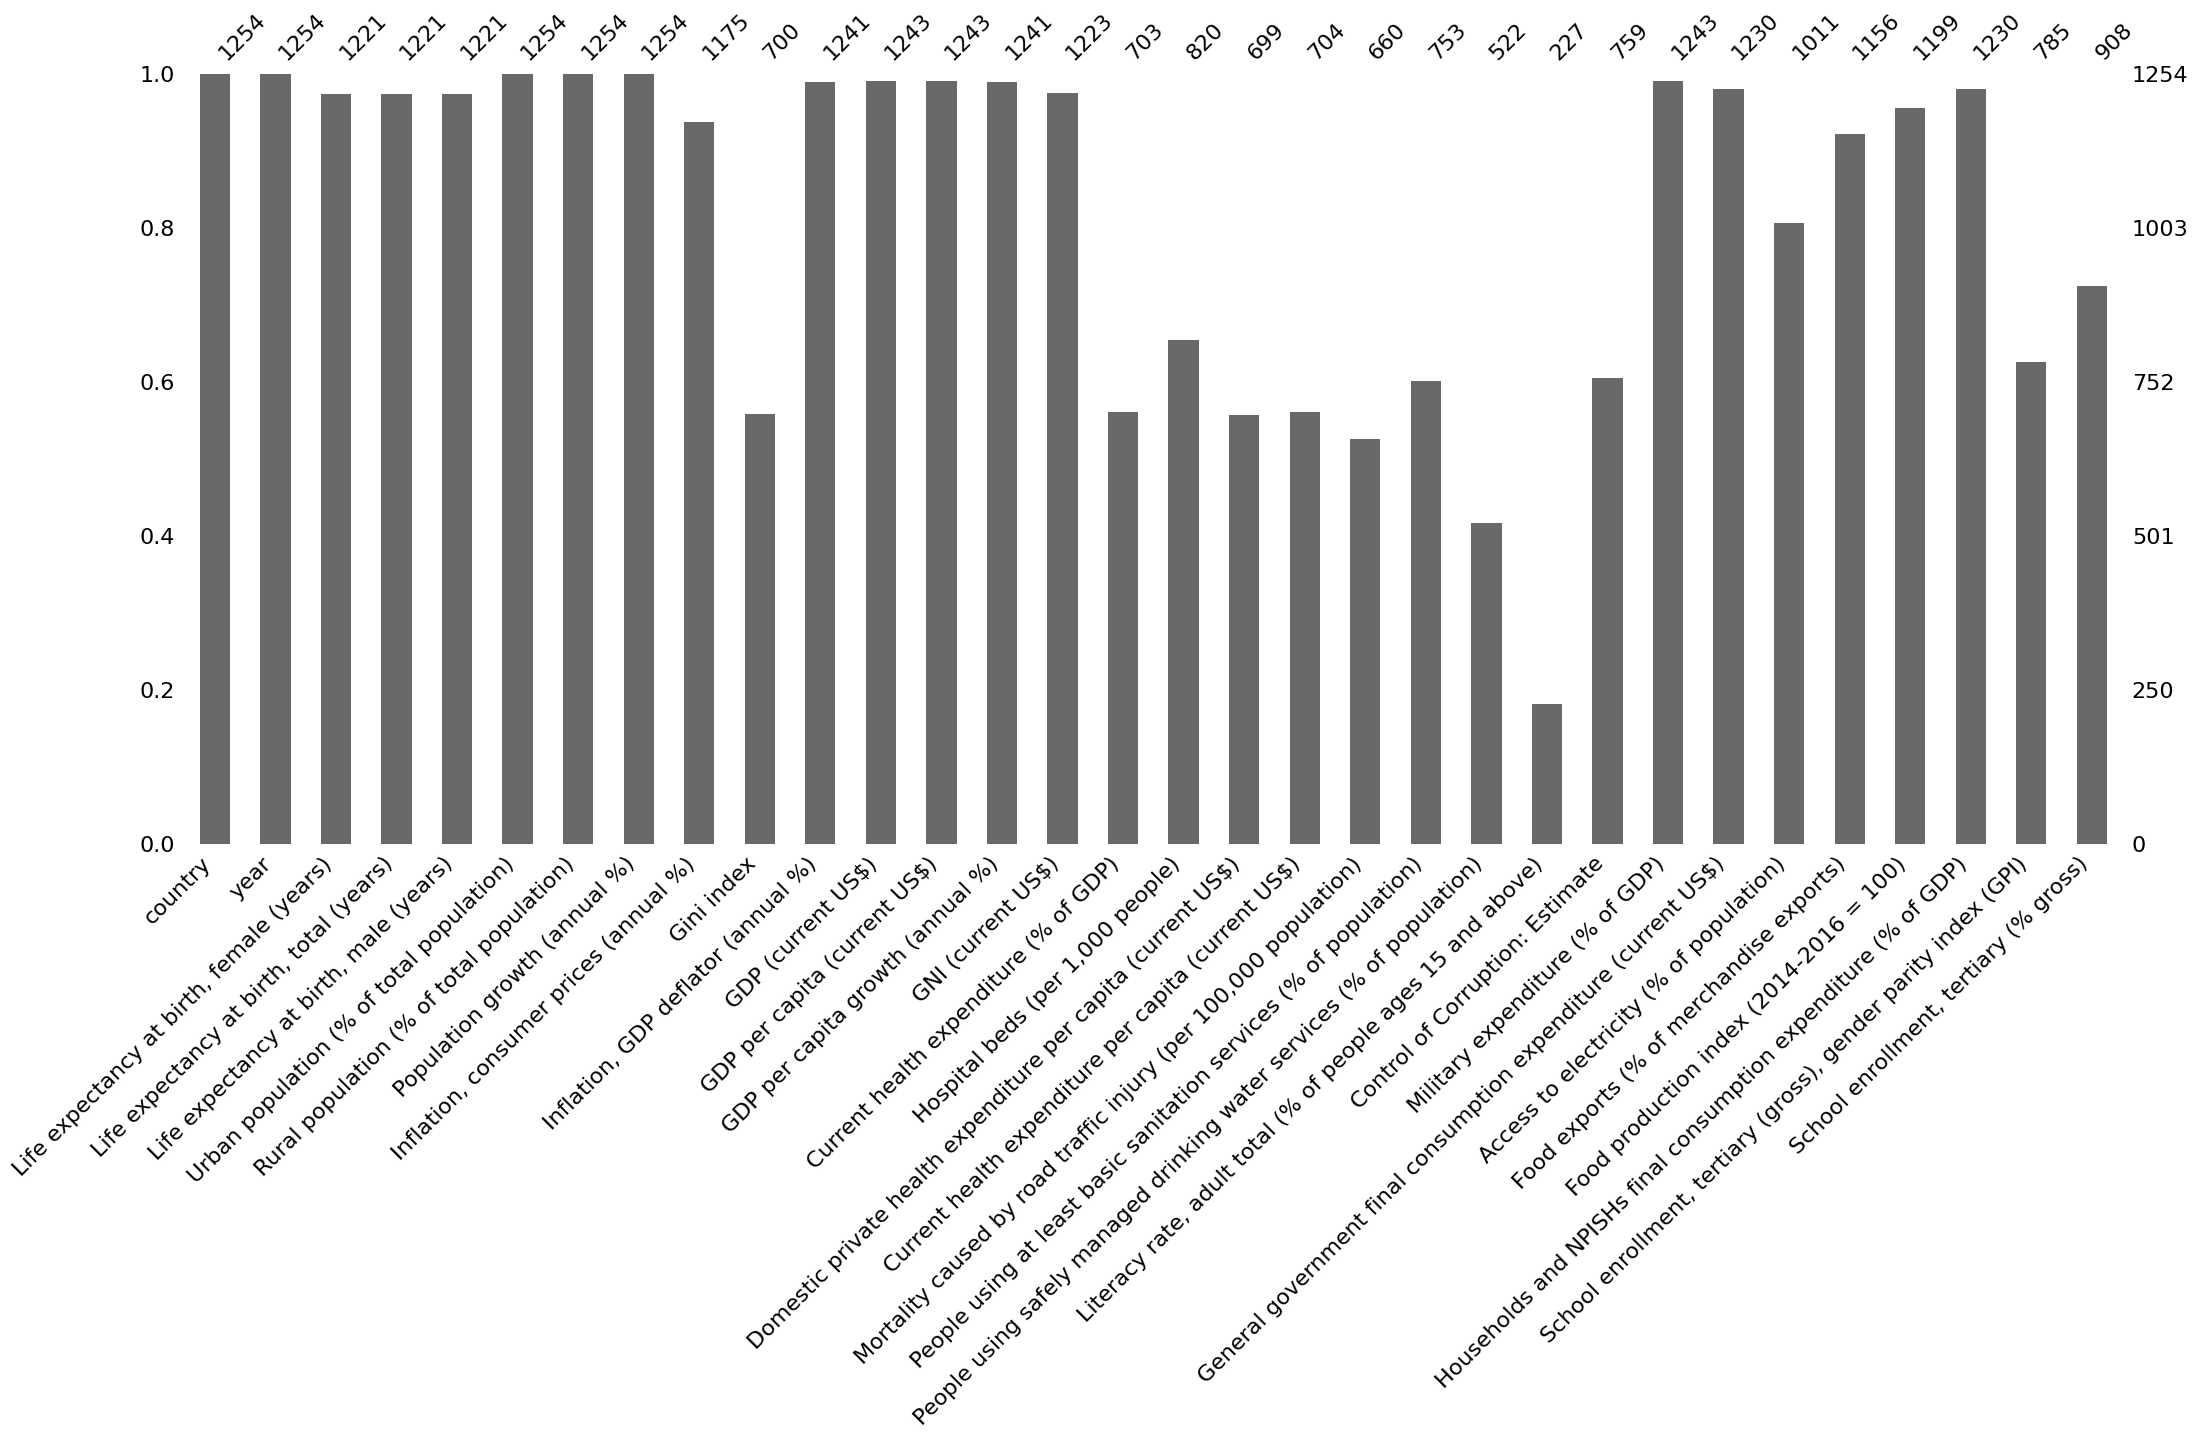

In [83]:
import matplotlib.pyplot as plt
import missingno as msno
# Generarando el gráfico
plt.figure(figsize=(10, 8)) 
msno.bar(df)
# Mostrar el gráfico
plt.show()

### Eliminar columna con más del 30% de datos faltantes

In [84]:
# Columnas a eliminar
drop_columns = [
                'Gini index',
                'Current health expenditure (% of GDP)',
                'Hospital beds (per 1,000 people)',
                'Domestic private health expenditure per capita (current US$)',
                'Current health expenditure per capita (current US$)',
                'Mortality caused by road traffic injury (per 100,000 population)',
                'People using at least basic sanitation services (% of population)',
                'People using safely managed drinking water services (% of population)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Control of Corruption: Estimate',
                'School enrollment, tertiary (gross), gender parity index (GPI)'
            ]

In [85]:
# Eliminar columnas del df
try:
    df.drop(drop_columns, axis = 'columns', inplace=True)
except:
    print("Las columnas fueron elimindos o no existen")
    print('*'*100)

df          

,country,year,"Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)",Urban population (% of total population),Rural population (% of total population),Population growth (annual %),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GNI (current US$),Military expenditure (% of GDP),General government final consumption expenditure (current US$),Access to electricity (% of population),Food exports (% of merchandise exports),Food production index (2014-2016 = 100),Households and NPISHs final consumption expenditure (% of GDP),"School enrollment, tertiary (% gross)"
0,ZAF,2022,NaN,NaN,NaN,68.335,31.665,0.841058,7.039727,5.054293,4.058697e+11,6776.480077,1.187663,3.974388e+11,0.739894,7.949644e+10,NaN,10.392224,NaN,63.094095,NaN
1,ZAF,2021,64.999,62.341,59.458,67.847,32.153,0.998920,4.611672,6.219017,4.190156e+11,7055.055176,3.870315,4.109907e+11,0.809813,8.232470e+10,89.3,9.657360,114.31,61.674318,NaN
2,ZAF,2020,67.964,65.252,62.178,67.354,32.646,1.223179,3.210036,5.692615,3.376196e+11,5741.641249,-7.481093,3.319875e+11,0.957517,7.019953e+10,90.0,11.846560,111.39,62.524709,24.236300
3,ZAF,2019,69.107,66.175,62.834,66.856,33.144,1.295074,4.120246,4.638081,3.885312e+11,6688.774746,-0.987175,3.788474e+11,0.884245,7.644400e+10,85.0,10.975456,104.54,63.931415,23.866560
4,ZAF,2018,68.740,65.674,62.203,66.355,33.645,1.225530,4.517165,3.745754,4.041589e+11,7048.508112,0.285736,3.928701e+11,0.897196,7.845114e+10,84.7,11.109532,104.32,63.903014,23.801960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,ARG,1989,74.735,71.425,68.090,86.613,13.387,1.487655,NaN,3046.091152,7.662973e+10,2382.338066,-8.527911,7.021289e+10,1.880366,3.444043e+09,NaN,NaN,46.09,73.511736,NaN
2050,ARG,1988,74.381,71.052,67.711,86.233,13.767,1.508087,NaN,381.246344,1.268902e+11,4004.009589,-2.570392,1.213696e+11,2.124939,5.484082e+09,NaN,NaN,49.57,73.718283,NaN
2051,ARG,1987,74.004,70.564,67.148,85.843,14.157,1.510974,NaN,127.539918,1.088109e+11,3485.690232,1.164690,1.037542e+11,2.284387,5.129883e+09,NaN,61.059345,48.61,75.433198,39.220650
2052,ARG,1986,73.638,70.119,66.655,85.445,14.555,1.511328,NaN,77.292237,1.058724e+11,3443.191431,4.561114,1.010889e+11,2.313679,NaN,NaN,66.628478,51.39,NaN,37.424992


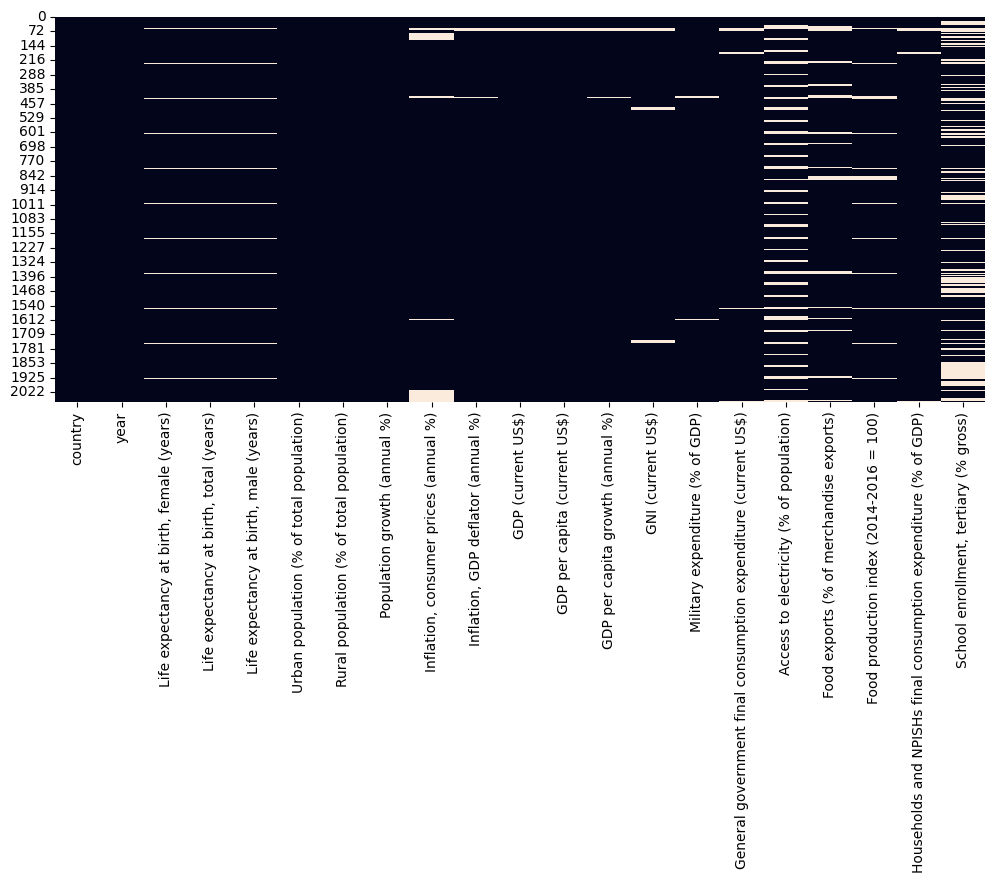

In [86]:
# Verificar  Datos faltantes
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

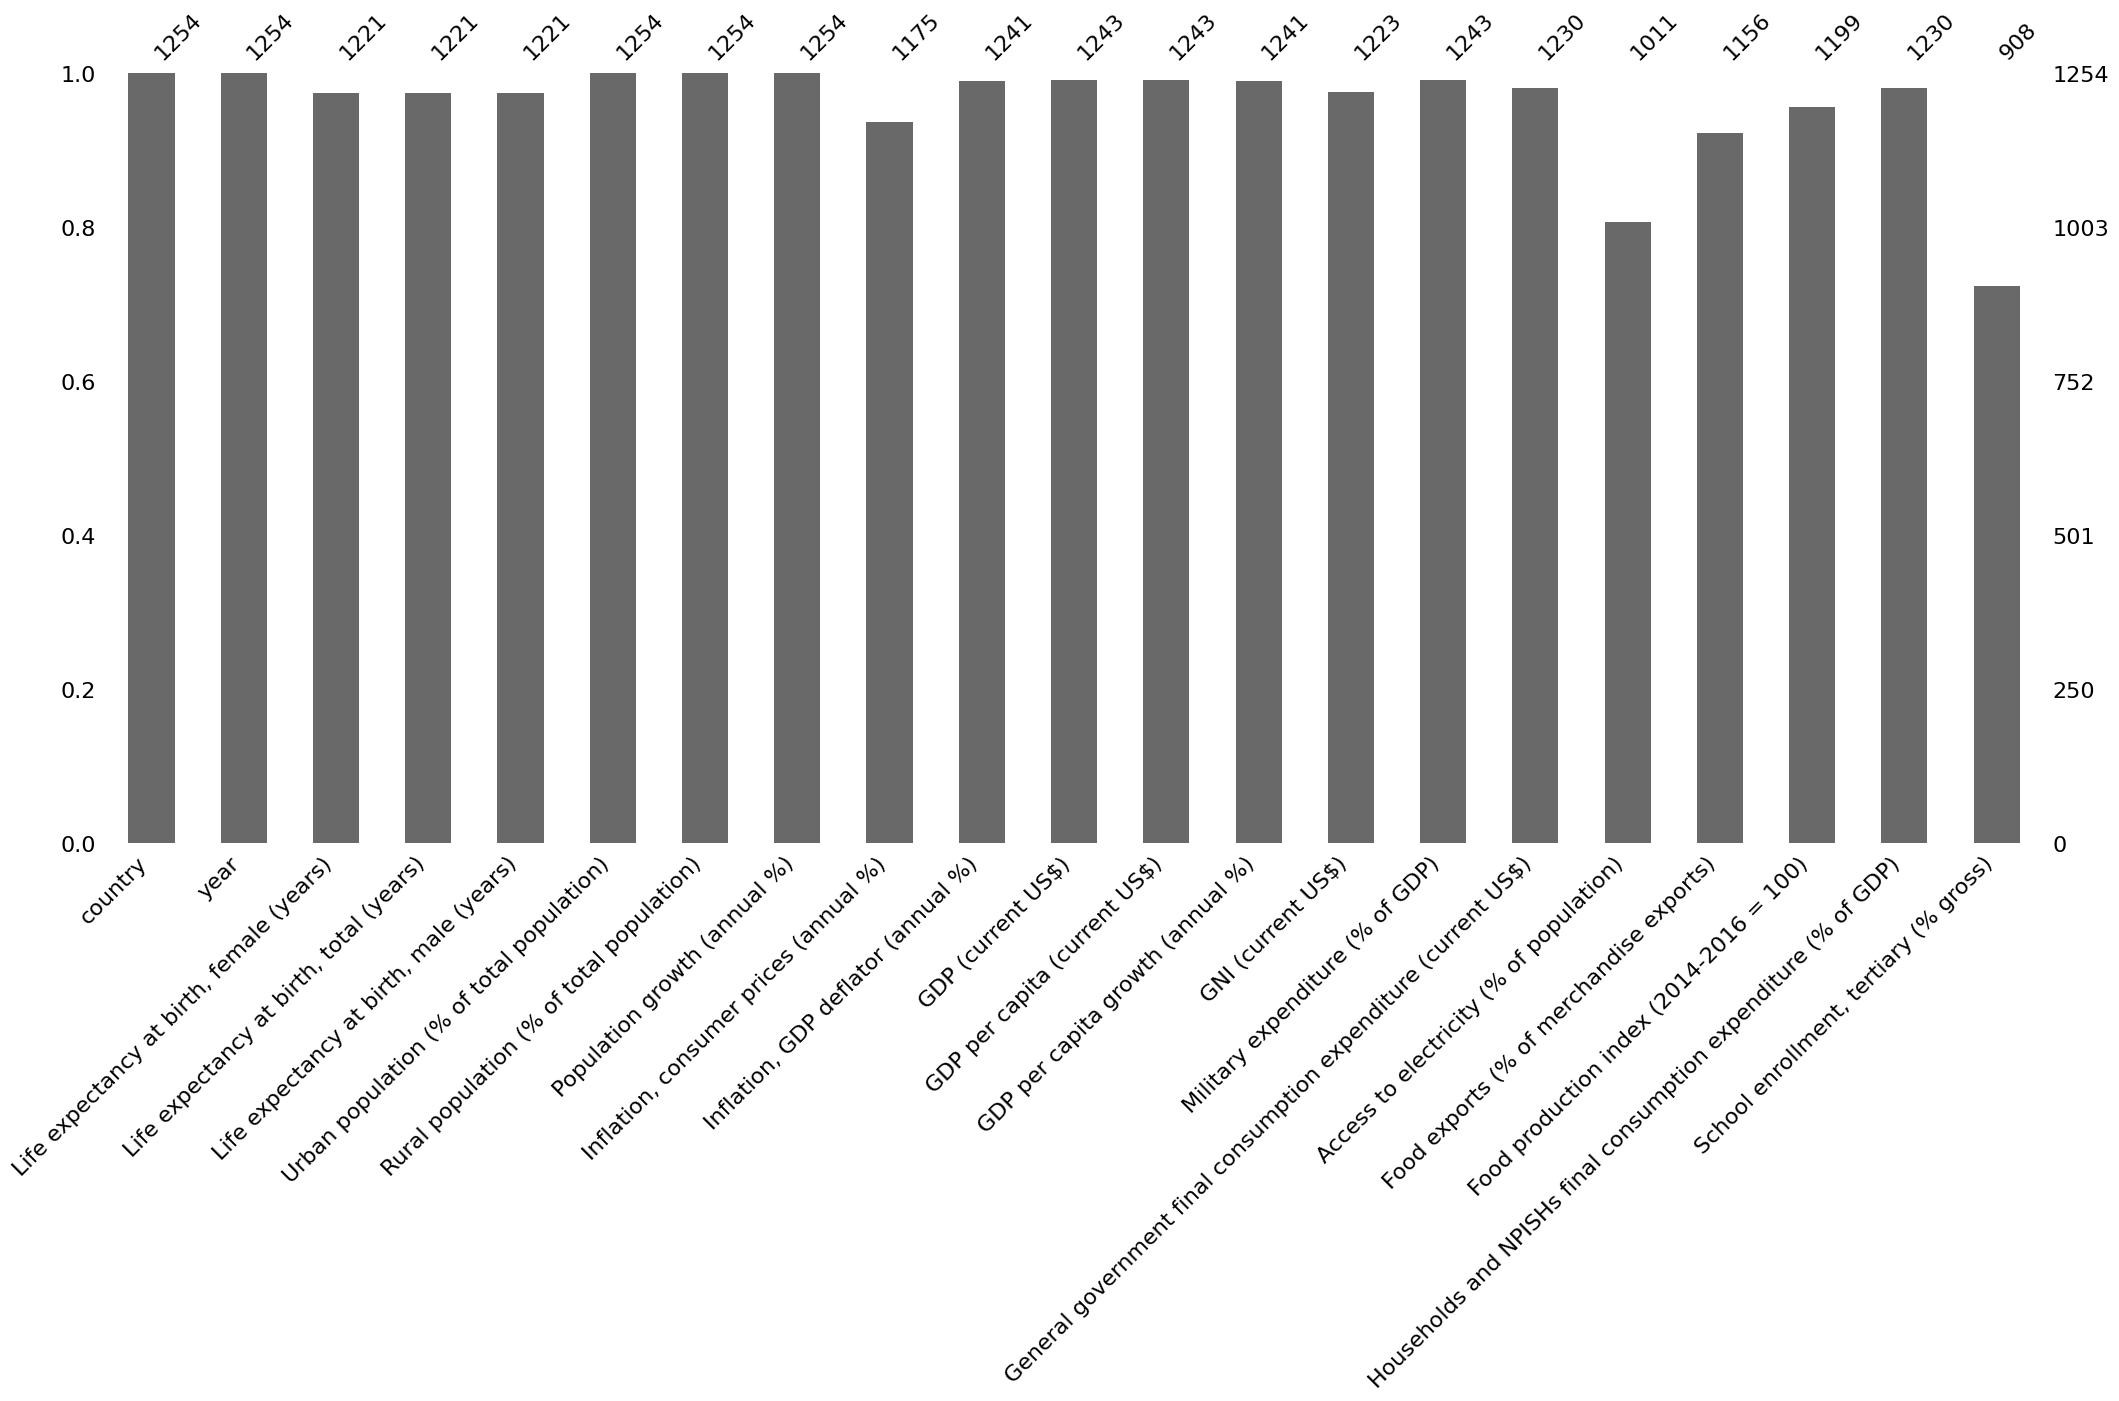

In [87]:
# Generarando el gráfico
plt.figure(figsize=(10, 8)) 
msno.bar(df)
# Mostrar el gráfico
plt.show()

In [88]:
# Verificar duplicados y eliminarlos si existen.
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (1254, 21)
Tamaño del set después de eliminar las filas repetidas: (1254, 21)


### Evaluación de Outliers
**Obsrvación**: No siempre se deben eliminar valores `outliers` ya que pueden contener información importante.

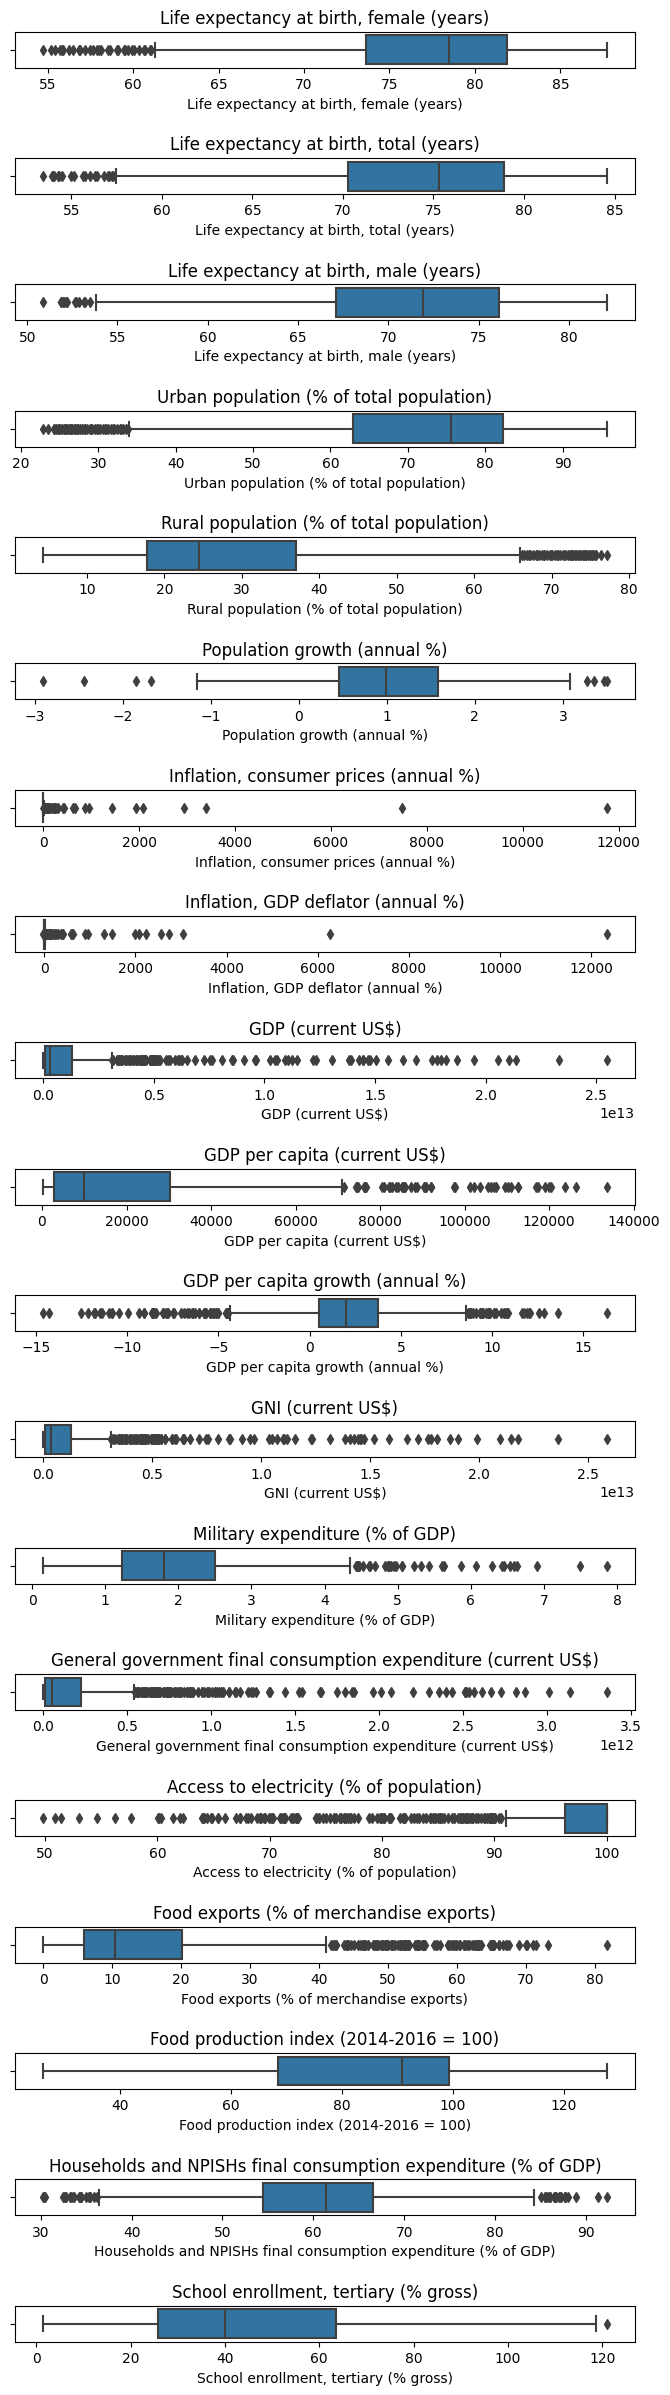

In [89]:
columns = df.columns.to_list()[2:]
fig, ax = plt.subplots(nrows=19, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=2.5)

for i, col in enumerate(columns):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

### Observaciones:
En los gráficos anteriores se evidencian valores que se encunetran fuera de los parametro normales los cuales se pueden tratar como outliers, sin embargo tomando en cuenta que la data representa economías de distintos tamaños y fortaleza la existencia de esos valores es factible por lo que se decide mantener todo el conjunto de datos para análisis posteriores.

In [90]:
print("Valores nulos en porcentaje")
print('*'*100)
# Valores Nulos
df.isnull().sum()*100/df.shape[0]

Valores nulos en porcentaje
****************************************************************************************************


country                                                            0.000000
year                                                               0.000000
Life expectancy at birth, female (years)                           2.631579
Life expectancy at birth, total (years)                            2.631579
Life expectancy at birth, male (years)                             2.631579
Urban population (% of total population)                           0.000000
Rural population (% of total population)                           0.000000
Population growth (annual %)                                       0.000000
Inflation, consumer prices (annual %)                              6.299841
Inflation, GDP deflator (annual %)                                 1.036683
GDP (current US$)                                                  0.877193
GDP per capita (current US$)                                       0.877193
GDP per capita growth (annual %)                                   1.036683
GNI (current

# se agregan los datos de acceso a internet

In [12]:
df = pd.read_csv('C:\\Users\ManVi\Desktop\Esperanza de vida\EDA\data_life.csv')
df

,country,year,"Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)",Urban population (% of total population),Rural population (% of total population),Population growth (annual %),"Inflation, consumer prices (annual %)",Gini index,"Inflation, GDP deflator (annual %)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GNI (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",Domestic private health expenditure per capita (current US$),Current health expenditure per capita (current US$),"Mortality caused by road traffic injury (per 100,000 population)",People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Control of Corruption: Estimate,Military expenditure (% of GDP),General government final consumption expenditure (current US$),Access to electricity (% of population),Food exports (% of merchandise exports),Food production index (2014-2016 = 100),Households and NPISHs final consumption expenditure (% of GDP),"School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary (% gross)"
0,EGY,2022,NaN,NaN,NaN,42.967,57.033,1.569074,13.895661,NaN,10.425789,4.767477e+11,4295.407496,4.928456,4.609845e+11,NaN,NaN,NaN,NaN,NaN,97.528750,NaN,NaN,NaN,1.061810,3.465046e+10,NaN,13.607104,NaN,82.522155,NaN,NaN
1,EGY,2021,72.608,70.221,67.935,42.862,57.138,1.658384,5.214049,NaN,4.847156,4.246718e+11,3886.722498,1.591816,4.122726e+11,NaN,NaN,NaN,NaN,NaN,97.524650,NaN,73.089996,-0.684838,1.122009,3.209688e+10,100.0,14.321835,102.75,86.005013,NaN,NaN
2,EGY,2020,73.390,70.990,68.667,42.783,57.217,1.733130,5.044933,NaN,6.176934,3.838178e+11,3571.556907,1.770969,3.724638e+11,4.364980,NaN,101.035651,150.906555,NaN,97.521561,NaN,NaN,-0.789792,1.122476,2.893949e+10,100.0,18.070859,103.76,83.645938,NaN,NaN
3,EGY,2019,73.711,71.358,69.049,42.730,57.270,1.794002,9.152800,31.9,13.618096,3.186788e+11,3017.258336,3.675371,3.076692e+11,4.836193,NaN,102.819814,145.310760,10.1,97.200558,NaN,NaN,-0.634925,1.180972,2.321754e+10,100.0,16.573575,100.61,80.496783,NaN,NaN
4,EGY,2018,73.927,71.367,68.875,42.704,57.296,1.898931,14.401466,NaN,21.174821,2.625886e+11,2531.200079,3.349815,2.563090e+11,4.993793,NaN,85.210025,120.223259,10.3,96.881001,NaN,NaN,-0.492104,1.249966,2.085537e+10,100.0,15.793587,96.32,83.290472,1.04445,38.904949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,CHN,1964,54.337,52.156,50.157,18.299,81.701,2.320683,NaN,NaN,-0.362038,5.970813e+10,85.498246,15.468995,5.970813e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.573671e+09,NaN,NaN,13.05,60.521124,NaN,NaN
2075,CHN,1963,53.608,51.408,49.407,17.757,82.243,2.457647,NaN,NaN,-2.621611,5.070662e+10,74.313375,7.622254,5.070662e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.863108e+09,NaN,NaN,12.32,67.627974,NaN,NaN
2076,CHN,1962,53.040,50.818,48.813,17.226,82.774,0.820456,NaN,NaN,-0.114965,4.720919e+10,70.909155,-6.351505,4.720919e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.990304e+09,NaN,NaN,11.77,72.164860,NaN,NaN
2077,CHN,1961,42.148,40.468,38.982,16.708,83.292,-1.015528,NaN,NaN,15.253994,5.005669e+10,75.805564,-26.527644,5.005669e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.157317e+09,NaN,NaN,11.10,66.274446,NaN,NaN


In [14]:
edata = pd.read_csv('datasets\Final.csv')
edata = edata.rename(columns={'Code':'country', 'Year':'year'})
edata = edata.drop(columns=['Unnamed: 0','Entity','Cellular Subscription','No. of Internet Users', 'Broadband Subscription'])


# Se incorpora los datos Internet Users(%) a df

df = df.merge(edata, how='left', on=['country','year'])
df.shape


(2079, 33)

In [15]:
# Guardar el DataFrame en un archivo CSV con codificación UTF-8
df.to_csv('datasets/indicadores_EVN.csv', encoding='utf-8', index=False)
countries_df.to_csv('datasets/contries_EVN.csv', encoding='utf-8', index=False)